In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
n_rounds = 10;

# Helper function to read input data
def read_input(s):
    df = pd.read_csv(s, header=None, names=['execution_time'])
    return df\
    .mask(df['execution_time'] > df['execution_time'].quantile(0.975), axis=0)

### Comparing execution time of batching vs vanilla hotcalls.

In [5]:
df_hotcall_warm_1 = read_input("./data/hotcall_bundle_v2/1/hotcall_sz_1_warm")
#df_hotcall_warm_2 = read_input("./data/hotcall_bundle/2/hotcall_sz_2_warm")
df_hotcall_warm_5 = read_input("./data/hotcall_bundle_v2/5/hotcall_sz_5_warm")
df_hotcall_warm_10 = read_input("./data/hotcall_bundle_v2/10/hotcall_sz_10_warm")
df_hotcall_warm_25 = read_input("./data/hotcall_bundle_v2/25/hotcall_sz_25_warm")
df_hotcall_warm_50 = read_input("./data/hotcall_bundle_v2/50/hotcall_sz_50_warm")
df_hotcall_warm_100 = read_input("./data/hotcall_bundle_v2/100/hotcall_sz_100_warm")


df_hotcall_cold_1 = read_input("./data/hotcall_bundle_v2/1/hotcall_sz_1_cold_2")
#df_hotcall_cold_2 = read_input("./data/hotcall_bundle/2/hotcall_sz_2_cold_2")
df_hotcall_cold_5 = read_input("./data/hotcall_bundle_v2/5/hotcall_sz_5_cold_2")
df_hotcall_cold_10 = read_input("./data/hotcall_bundle_v2/10/hotcall_sz_10_cold_2")
df_hotcall_cold_25 = read_input("./data/hotcall_bundle_v2/25/hotcall_sz_25_cold_2")
df_hotcall_cold_50 = read_input("./data/hotcall_bundle_v2/50/hotcall_sz_50_cold_2")
df_hotcall_cold_100 = read_input("./data/hotcall_bundle_v2/100/hotcall_sz_100_cold_2")

df_hotcall_bundle_warm_1 = read_input("./data/hotcall_bundle_v2/1/hotcall_bundle_sz_1_warm")
#df_hotcall_bundle_warm_2 = read_input("./data/hotcall_bundle/2/hotcall_bundle_sz_2_warm")
df_hotcall_bundle_warm_5 = read_input("./data/hotcall_bundle_v2/5/hotcall_bundle_sz_5_warm")
df_hotcall_bundle_warm_10 = read_input("./data/hotcall_bundle_v2/10/hotcall_bundle_sz_10_warm")
df_hotcall_bundle_warm_25 = read_input("./data/hotcall_bundle_v2/25/hotcall_bundle_sz_25_warm")
df_hotcall_bundle_warm_50 = read_input("./data/hotcall_bundle_v2/50/hotcall_bundle_sz_50_warm")
df_hotcall_bundle_warm_100 = read_input("./data/hotcall_bundle_v2/100/hotcall_bundle_sz_100_warm")


df_hotcall_bundle_cold_1 = read_input("./data/hotcall_bundle_v2/1/hotcall_bundle_sz_1_cold_2")
#df_hotcall_bundle_cold_2 = read_input("./data/hotcall_bundle/2/hotcall_bundle_sz_2_cold_2")
df_hotcall_bundle_cold_5 = read_input("./data/hotcall_bundle_v2/5/hotcall_bundle_sz_5_cold_2")
df_hotcall_bundle_cold_10 = read_input("./data/hotcall_bundle_v2/10/hotcall_bundle_sz_10_cold_2")
df_hotcall_bundle_cold_25 = read_input("./data/hotcall_bundle_v2/25/hotcall_bundle_sz_25_cold_2")
df_hotcall_bundle_cold_50 = read_input("./data/hotcall_bundle_v2/50/hotcall_bundle_sz_50_cold_2")
df_hotcall_bundle_cold_100 = read_input("./data/hotcall_bundle_v2/100/hotcall_bundle_sz_100_cold_2")



df_medians = pd.DataFrame({
    'hotcall_warm': [
        df_hotcall_warm_1.median()[0], 
        df_hotcall_warm_5.median()[0], 
        df_hotcall_warm_10.median()[0], 
        df_hotcall_warm_25.median()[0],
        df_hotcall_warm_50.median()[0],
        df_hotcall_warm_100.median()[0]
    ],
    'hotcall_cold': [
        df_hotcall_cold_1.median()[0], 
        df_hotcall_cold_5.median()[0], 
        df_hotcall_cold_10.median()[0], 
        df_hotcall_cold_25.median()[0],
        df_hotcall_cold_50.median()[0],
        df_hotcall_cold_100.median()[0]
    ],
    'hotcall_bundle_warm': [
        df_hotcall_bundle_warm_1.median()[0], 
        df_hotcall_bundle_warm_5.median()[0], 
        df_hotcall_bundle_warm_10.median()[0], 
        df_hotcall_bundle_warm_25.median()[0],
        df_hotcall_bundle_warm_50.median()[0],
        df_hotcall_bundle_warm_100.median()[0]
    ],
    'hotcall_bundle_cold': [
        df_hotcall_bundle_cold_1.median()[0], 
        df_hotcall_bundle_cold_5.median()[0], 
        df_hotcall_bundle_cold_10.median()[0], 
        df_hotcall_bundle_cold_25.median()[0],
        df_hotcall_bundle_cold_50.median()[0],
        df_hotcall_bundle_cold_100.median()[0]
    ]
})
idx = pd.Series(['1', '5', '10', '25', '50', '100'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Time to execute hotcalls bundles of different sizes.')

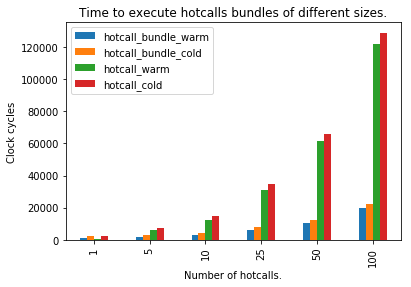

In [6]:
df_medians[['hotcall_bundle_warm', 'hotcall_bundle_cold', 'hotcall_warm', 'hotcall_cold']].plot.bar()
plt.xlabel("Number of hotcalls.")
plt.ylabel("Clock cycles")
plt.title("Time to execute hotcalls bundles of different sizes.")

## Evaluation of enclave function memoization

In [7]:
df_memo_fifo_warm = read_input("./data/memoize/memoize_fifo/memoize_fifo_warm")
df_memo_fifo_cold = read_input("./data/memoize/memoize_fifo/memoize_fifo_cold_2")

df_memo_lru_warm = read_input("./data/memoize/memoize_lru/memoize_lru_warm")
df_memo_lru_cold = read_input("./data/memoize/memoize_lru/memoize_lru_cold_2")

df_memo_mod_warm = read_input("./data/memoize/memoize_mod/memoize_mod_warm")
df_memo_mod_cold = read_input("./data/memoize/memoize_mod/memoize_mod_cold_2")

df_memo_off_warm = read_input("./data/memoize/memoize_off/memoize_off_warm")
df_memo_off_cold = read_input("./data/memoize/memoize_off/memoize_off_cold_2")

df_medians = pd.DataFrame({
    'memoize_fifo': [
        df_memo_fifo_warm.median()[0], 
        df_memo_fifo_cold.median()[0]
    ],
    'memoize_lru': [
        df_memo_lru_warm.median()[0], 
        df_memo_lru_cold.median()[0]
    ],
    'memoize_mod': [
        df_memo_mod_warm.median()[0], 
        df_memo_mod_cold.median()[0]
    ],
    'memoize_off': [
        df_memo_off_warm.median()[0], 
        df_memo_off_cold.median()[0]
    ]
})
idx = pd.Series(['hot', 'cold'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Median clock cycles to access a value with memoization.')

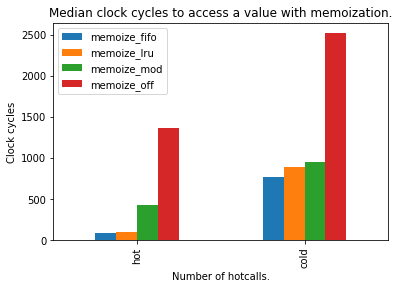

In [8]:
df_medians[['memoize_fifo', 'memoize_lru', 'memoize_mod', 'memoize_off']].plot.bar()
plt.xlabel("Number of hotcalls.")
plt.ylabel("Clock cycles")
plt.title("Median clock cycles to access a value with memoization.")

### Evaluating the performance of loops and iterators

In [13]:
df_loop_for_each_sz_1_warm = read_input("./data/loop_size/hotcall_for_each_sz_1/hotcall_bundle_for_each_sz_1_warm")
df_loop_for_each_sz_1_cold = read_input("./data/loop_size/hotcall_for_each_sz_1/hotcall_bundle_for_each_sz_1_cold_2")

df_loop_for_each_sz_2_warm = read_input("./data/loop_size/hotcall_for_each_sz_2/hotcall_bundle_for_each_sz_2_warm")
df_loop_for_each_sz_2_cold = read_input("./data/loop_size/hotcall_for_each_sz_2/hotcall_bundle_for_each_sz_2_cold_2")

df_loop_for_each_sz_5_warm = read_input("./data/loop_size/hotcall_for_each_sz_5/hotcall_bundle_for_each_sz_5_warm")
df_loop_for_each_sz_5_cold = read_input("./data/loop_size/hotcall_for_each_sz_5/hotcall_bundle_for_each_sz_5_cold_2")

df_loop_for_each_sz_10_warm = read_input("./data/loop_size/hotcall_for_each_sz_10/hotcall_bundle_for_each_sz_10_warm")
df_loop_for_each_sz_10_cold = read_input("./data/loop_size/hotcall_for_each_sz_10/hotcall_bundle_for_each_sz_10_cold_2")

df_loop_for_each_sz_25_warm = read_input("./data/loop_size/hotcall_for_each_sz_25/hotcall_bundle_for_each_sz_25_warm")
df_loop_for_each_sz_25_cold = read_input("./data/loop_size/hotcall_for_each_sz_25/hotcall_bundle_for_each_sz_25_cold_2")

df_loop_for_each_sz_50_warm = read_input("./data/loop_size/hotcall_for_each_sz_50/hotcall_bundle_for_each_sz_50_warm")
df_loop_for_each_sz_50_cold = read_input("./data/loop_size/hotcall_for_each_sz_50/hotcall_bundle_for_each_sz_50_cold_2")

df_loop_for_each_sz_100_warm = read_input("./data/loop_size/hotcall_for_each_sz_100/hotcall_bundle_for_each_sz_100_warm")
df_loop_for_each_sz_100_cold = read_input("./data/loop_size/hotcall_for_each_sz_100/hotcall_bundle_for_each_sz_100_cold_2")

In [14]:
df_loop_for_sz_1_warm = read_input("./data/loop_size/hotcall_for_sz_1/hotcall_bundle_for_sz_1_warm")
df_loop_for_sz_1_cold = read_input("./data/loop_size/hotcall_for_sz_1/hotcall_bundle_for_sz_1_cold_2")

df_loop_for_sz_2_warm = read_input("./data/loop_size/hotcall_for_sz_2/hotcall_bundle_for_sz_2_warm")
df_loop_for_sz_2_cold = read_input("./data/loop_size/hotcall_for_sz_2/hotcall_bundle_for_sz_2_cold_2")

df_loop_for_sz_5_warm = read_input("./data/loop_size/hotcall_for_sz_5/hotcall_bundle_for_sz_5_warm")
df_loop_for_sz_5_cold = read_input("./data/loop_size/hotcall_for_sz_5/hotcall_bundle_for_sz_5_cold_2")

df_loop_for_sz_10_warm = read_input("./data/loop_size/hotcall_for_sz_10/hotcall_bundle_for_sz_10_warm")
df_loop_for_sz_10_cold = read_input("./data/loop_size/hotcall_for_sz_10/hotcall_bundle_for_sz_10_cold_2")

df_loop_for_sz_25_warm = read_input("./data/loop_size/hotcall_for_sz_25/hotcall_bundle_for_sz_25_warm")
df_loop_for_sz_25_cold = read_input("./data/loop_size/hotcall_for_sz_25/hotcall_bundle_for_sz_25_cold_2")

df_loop_for_sz_50_warm = read_input("./data/loop_size/hotcall_for_sz_50/hotcall_bundle_for_sz_50_warm")
df_loop_for_sz_50_cold = read_input("./data/loop_size/hotcall_for_sz_50/hotcall_bundle_for_sz_50_cold_2")

df_loop_for_sz_100_warm = read_input("./data/loop_size/hotcall_for_sz_100/hotcall_bundle_for_sz_100_warm")
df_loop_for_sz_100_cold = read_input("./data/loop_size/hotcall_for_sz_100/hotcall_bundle_for_sz_100_cold_2")

In [15]:
df_medians = pd.DataFrame({
    'loop_hot': [
        df_loop_for_sz_1_warm.median()[0], 
        df_loop_for_sz_2_warm.median()[0],
        df_loop_for_sz_5_warm.median()[0],
        df_loop_for_sz_10_warm.median()[0],
        df_loop_for_sz_25_warm.median()[0],
        df_loop_for_sz_50_warm.median()[0],
        df_loop_for_sz_100_warm.median()[0]
    ],
    'loop_cold': [
        df_loop_for_sz_1_cold.median()[0], 
        df_loop_for_sz_2_cold.median()[0], 
        df_loop_for_sz_5_cold.median()[0], 
        df_loop_for_sz_10_cold.median()[0], 
        df_loop_for_sz_25_cold.median()[0], 
        df_loop_for_sz_50_cold.median()[0], 
        df_loop_for_sz_100_cold.median()[0], 
    ],
    'iter_hot': [
        df_loop_for_each_sz_1_warm.median()[0], 
        df_loop_for_each_sz_2_warm.median()[0],
        df_loop_for_each_sz_5_warm.median()[0],
        df_loop_for_each_sz_10_warm.median()[0],
        df_loop_for_each_sz_25_warm.median()[0],
        df_loop_for_each_sz_50_warm.median()[0],
        df_loop_for_each_sz_100_warm.median()[0]
    ],
    'iter_cold': [
        df_loop_for_each_sz_1_cold.median()[0], 
        df_loop_for_each_sz_2_cold.median()[0],
        df_loop_for_each_sz_5_cold.median()[0],
        df_loop_for_each_sz_10_cold.median()[0],
        df_loop_for_each_sz_25_cold.median()[0],
        df_loop_for_each_sz_50_cold.median()[0],
        df_loop_for_each_sz_100_cold.median()[0]
    ]
})


idx = pd.Series(['1', '2', '5', '10', '25', '50', '100'])
df_medians = df_medians.set_index(idx)
df_medians.head(10)

,iter_cold,iter_hot,loop_cold,loop_hot
1,2691.0,1170.0,4153.0,1622.0
2,2845.0,1365.0,4190.0,1654.0
5,2826.0,1279.0,4700.0,2159.0
10,2820.0,1339.0,5538.0,3114.0
25,3054.0,1442.0,8033.0,5539.0
50,3417.0,1786.0,12279.0,9636.0
100,3943.0,2433.0,20854.0,17865.0


Text(0.5,1,'Median execution time to execute different amount of ecalls inside of a loop.')

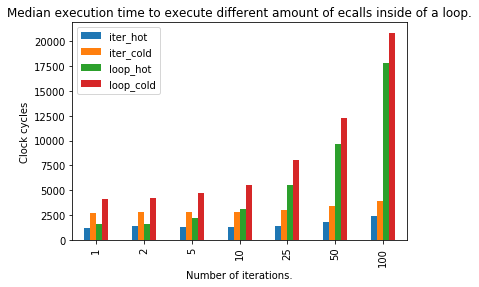

In [16]:
df_medians[['iter_hot', 'iter_cold', 'loop_hot', 'loop_cold']].plot.bar()
plt.xlabel("Number of iterations.")
plt.ylabel("Clock cycles")
plt.title("Median execution time to execute different amount of ecalls inside of a loop.")

## Is there a point where loops become more efficient than iterators?

In [17]:
df_loop_body_sz_1_warm = read_input("./data/loop_body_size/hotcall_loop_1/hotcall_branch_true_warm")
df_loop_body_sz_3_warm = read_input("./data/loop_body_size/hotcall_loop_3/hotcall_branch_true_warm")
df_loop_body_sz_5_warm = read_input("./data/loop_body_size/hotcall_loop_5/hotcall_branch_true_warm")
df_loop_body_sz_10_warm = read_input("./data/loop_body_size/hotcall_loop_10/hotcall_branch_true_warm")

df_loop_body_sz_1_cold = read_input("./data/loop_body_size/hotcall_loop_1/hotcall_branch_true_cold_2")
df_loop_body_sz_3_cold = read_input("./data/loop_body_size/hotcall_loop_3/hotcall_branch_true_cold_2")
df_loop_body_sz_5_cold = read_input("./data/loop_body_size/hotcall_loop_5/hotcall_branch_true_cold_2")
df_loop_body_sz_10_cold = read_input("./data/loop_body_size/hotcall_loop_10/hotcall_branch_true_cold_2")

In [18]:
df_iter_body_sz_1_warm = read_input("./data/loop_body_size/hotcall_iterator_1/hotcall_branch_true_warm")
df_iter_body_sz_3_warm = read_input("./data/loop_body_size/hotcall_iterator_3/hotcall_branch_true_warm")
df_iter_body_sz_5_warm = read_input("./data/loop_body_size/hotcall_iterator_5/hotcall_branch_true_warm")
df_iter_body_sz_10_warm = read_input("./data/loop_body_size/hotcall_iterator_10/hotcall_branch_true_warm")

df_iter_body_sz_1_cold = read_input("./data/loop_body_size/hotcall_iterator_1/hotcall_branch_true_cold_2")
df_iter_body_sz_3_cold = read_input("./data/loop_body_size/hotcall_iterator_3/hotcall_branch_true_cold_2")
df_iter_body_sz_5_cold = read_input("./data/loop_body_size/hotcall_iterator_5/hotcall_branch_true_cold_2")
df_iter_body_sz_10_cold = read_input("./data/loop_body_size/hotcall_iterator_10/hotcall_branch_true_cold_2")

In [19]:
df_medians = pd.DataFrame({
    'iter_hot': [
        df_iter_body_sz_1_warm.median()[0], 
        df_iter_body_sz_3_warm.median()[0],
        df_iter_body_sz_5_warm.median()[0],
        df_iter_body_sz_10_warm.median()[0]
    ],
    'iter_cold': [
        df_iter_body_sz_1_cold.median()[0], 
        df_iter_body_sz_3_cold.median()[0],
        df_iter_body_sz_5_cold.median()[0],
        df_iter_body_sz_10_cold.median()[0]
    ],
    'loop_hot': [
        df_loop_body_sz_1_warm.median()[0], 
        df_loop_body_sz_3_warm.median()[0],
        df_loop_body_sz_5_warm.median()[0],
        df_loop_body_sz_10_warm.median()[0]
    ],
    'loop_cold': [
        df_loop_body_sz_1_cold.median()[0], 
        df_loop_body_sz_3_cold.median()[0],
        df_loop_body_sz_5_cold.median()[0],
        df_loop_body_sz_10_cold.median()[0]
    ]
})


idx = pd.Series(['1', '3', '5', '10'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Median execution time, 20 iterations.')

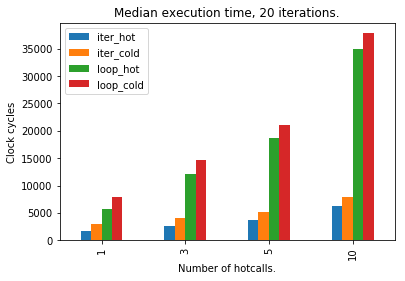

In [20]:
df_medians[['iter_hot', 'iter_cold', 'loop_hot', 'loop_cold']].plot.bar()
plt.xlabel("Number of hotcalls.")
plt.ylabel("Clock cycles")
plt.title("Median execution time, 20 iterations.")

It appears that iterators will always be more efficient than loops. Important insight, if you can use iterators instead of loops then do it!

## Evaluation of enclave branching

In [21]:
df_branch_true_warm = read_input("./data/branch/hotcall_branch_true/hotcall_branch_true_warm")
df_branch_true_cold = read_input("./data/branch/hotcall_branch_true/hotcall_branch_true_cold_2")

df_branch_true_naive_warm = read_input("./data/branch/hotcall_branch_true_naive/hotcall_branch_true_warm")
df_branch_true_naive_cold = read_input("./data/branch/hotcall_branch_true_naive/hotcall_branch_true_cold_2")

df_branch_false_warm = read_input("./data/branch/hotcall_branch_false/hotcall_branch_true_warm")
df_branch_false_cold = read_input("./data/branch/hotcall_branch_false/hotcall_branch_true_cold_2")

df_branch_false_naive_warm = read_input("./data/branch/hotcall_branch_false_naive/hotcall_branch_true_warm")
df_branch_false_naive_cold = read_input("./data/branch/hotcall_branch_false_naive/hotcall_branch_true_cold_2")

In [22]:
df_medians = pd.DataFrame({
    'enclave branch': [
        df_branch_true_warm.median()[0], 
        df_branch_true_cold.median()[0]
    ],
    'app branch': [
        df_branch_true_naive_warm.median()[0], 
        df_branch_true_naive_cold.median()[0]
    ]
})

idx = pd.Series(['hot', 'cold'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Median execution times to execute graph containing branch with true condition.')

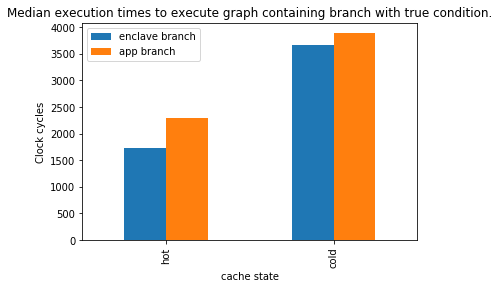

In [24]:
df_medians[['enclave branch', 'app branch']].plot.bar()
plt.xlabel("cache state")
plt.ylabel("Clock cycles")
plt.title("Median execution times to execute graph containing branch with true condition.")

In [25]:
df_medians = pd.DataFrame({
    'enclave branch': [
        df_branch_false_warm.median()[0], 
        df_branch_false_cold.median()[0]
    ],
    'app branch': [
        df_branch_false_naive_warm.median()[0], 
        df_branch_false_naive_cold.median()[0]
    ]
})

idx = pd.Series(['hot', 'cold'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Median execution times to execute graph containing branch with false condition.')

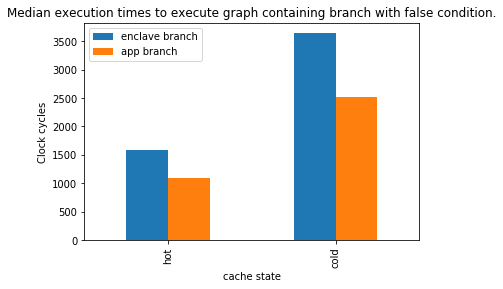

In [26]:
df_medians[['enclave branch', 'app branch']].plot.bar()
plt.xlabel("cache state")
plt.ylabel("Clock cycles")
plt.title("Median execution times to execute graph containing branch with false condition.")

We observe that using enclave branching give a small speed when the branch is taken while enclave branching give worse performance it the branch is not taken. We conclude that enclave branching is a good idea in cases where condition is very likely to be true. In other cases, the overhead of evaluation the condition and building the execution graph results in too much overhead. 

In [27]:
df_branch_true_warm_loop = read_input("./data/branch_loop/hotcall_branch_true_loop/hotcall_branch_true_loop_warm")
df_branch_true_cold_loop = read_input("./data/branch_loop/hotcall_branch_true_loop/hotcall_branch_true_loop_cold_2")

df_branch_true_naive_warm_loop = read_input("./data/branch_loop/hotcall_branch_true_naive_loop/hotcall_branch_true_naive_loop_warm")
df_branch_true_naive_cold_loop = read_input("./data/branch_loop/hotcall_branch_true_naive_loop/hotcall_branch_true_naive_loop_cold_2")

df_branch_false_warm_loop = read_input("./data/branch_loop/hotcall_branch_false_loop/hotcall_branch_false_loop_warm")
df_branch_false_cold_loop = read_input("./data/branch_loop/hotcall_branch_false_loop/hotcall_branch_false_loop_cold_2")

df_branch_false_naive_warm_loop = read_input("./data/branch_loop/hotcall_branch_false_naive_loop/hotcall_branch_false_naive_loop_warm")
df_branch_false_naive_cold_loop = read_input("./data/branch_loop/hotcall_branch_false_naive_loop/hotcall_branch_false_naive_loop_cold_2")

In [28]:
df_medians = pd.DataFrame({
    'enclave branch': [
        df_branch_false_warm_loop.median()[0], 
        df_branch_false_cold_loop.median()[0]
    ],
    'app branch': [
        df_branch_false_naive_warm_loop.median()[0], 
        df_branch_false_naive_cold_loop.median()[0]
    ]
})

idx = pd.Series(['hot', 'cold'])
df_medians = df_medians.set_index(idx)

Text(0.5,1,'Median execution times to execute graph containing branch with false condition. 2 iterations')

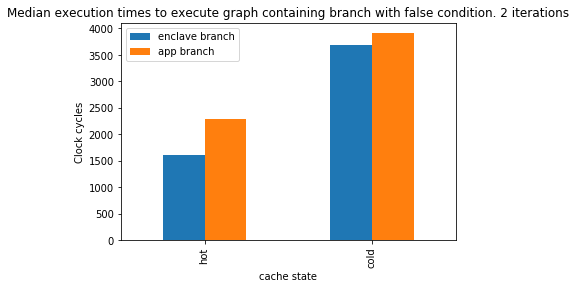

In [29]:
df_medians[['enclave branch', 'app branch']].plot.bar()
plt.xlabel("cache state")
plt.ylabel("Clock cycles")
plt.title("Median execution times to execute graph containing branch with false condition. 2 iterations")

We observe that when wrapping an branch inside of a loop which loops more than once, encalve branch execution becomes faster for false branch benchmark.

Thus we can conclude that if the branch takes place inside a loop which is likely to loop more than once, then it makes sense to use enclave branching as opposed to applicaton branching.